In [1]:
import os 
import tensorflow as tf
from keras import models, layers
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
img_height = 150
img_width = 150

In [19]:
datagen = ImageDataGenerator(
    rotation_range=20,
    rescale=1. / 255, # rescale de image at the wirght format
    width_shift_range=0.10, # Shift the pic width by a max of 5%
    height_shift_range=0.10, # Shift the pic height by a max of 5% 
    shear_range=0.1, # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1, # Zoom in by 10% max
    horizontal_flip=True, # Allo horizontal flipping
    fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)

In [20]:
base_dir = r"C:/Users/utilisateur/Desktop/IA/learningCode/Projects_Simplon/AlienVsPredator/"

train_dir =  os.path.join(base_dir,"Train")
validation_dir =  os.path.join(base_dir,"Validation")
test_dir =  os.path.join(base_dir,"Test")


In [21]:


train_generator = datagen.flow_from_directory(      train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=494,
                                                    class_mode='binary')


val_datagen = ImageDataGenerator(rescale=1. / 255)

val_generator = val_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=200,
                                                    class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150, 150),
                                                    batch_size=200,
                                                    class_mode='binary')






Found 494 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [22]:
train_generator.class_indices

{'Alien': 0, 'Predator': 1}

In [23]:
val_generator.class_indices

{'Alien': 0, 'Predator': 1}

In [8]:
model  = Sequential([
            layers.Conv2D(filters=16, kernel_size=3, strides=1, activation='relu', input_shape=(150, 150, 3)),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(filters=32, kernel_size=3, strides=1, activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(filters=64, kernel_size=3, strides=1, activation='relu'),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            #layers.Dropout(0.5),
            layers.Dense(units=512, activation='relu'),
            layers.Dense(units=1, activation='sigmoid')
            ])

model.compile(loss='binary_crossentropy' , metrics=["accuracy"] , optimizer= 'Adam')

In [24]:
history = model.fit(train_generator, epochs=500, batch_size= all, validation_data=val_generator)

Epoch 1/500
1/1 [==============================] - 10s 10s/step - loss: 0.9674 - accuracy: 0.7449 - val_loss: 3.7165 - val_accuracy: 0.5850
Epoch 2/500
1/1 [==============================] - 9s 9s/step - loss: 2.2430 - accuracy: 0.5769 - val_loss: 4.3525 - val_accuracy: 0.5400
Epoch 3/500
1/1 [==============================] - 9s 9s/step - loss: 3.0881 - accuracy: 0.5891 - val_loss: 3.7063 - val_accuracy: 0.5450
Epoch 4/500
1/1 [==============================] - 11s 11s/step - loss: 2.5763 - accuracy: 0.5830 - val_loss: 1.1761 - val_accuracy: 0.6600
Epoch 5/500
1/1 [==============================] - 9s 9s/step - loss: 0.9300 - accuracy: 0.6984 - val_loss: 1.4771 - val_accuracy: 0.6100
Epoch 6/500
1/1 [==============================] - 9s 9s/step - loss: 0.9544 - accuracy: 0.6478 - val_loss: 2.0098 - val_accuracy: 0.5450
Epoch 7/500
1/1 [==============================] - 9s 9s/step - loss: 1.4090 - accuracy: 0.5223 - val_loss: 1.4741 - val_accuracy: 0.5650
Epoch 8/500
1/1 [=============

### Mémo 

Acc and val_acc are measured to evaluate your model fitting. When there is a significant difference between these two, your model is overfitting. The validation accuracy (val_acc) should be equal or slightly less than the training accuracy (acc) to be a better model.

When the training loss starts increasing (i.e. val_acc is decreasing ) one should stop. But again if the overall accuracy is showing the significant difference you should think about some changes in the model.

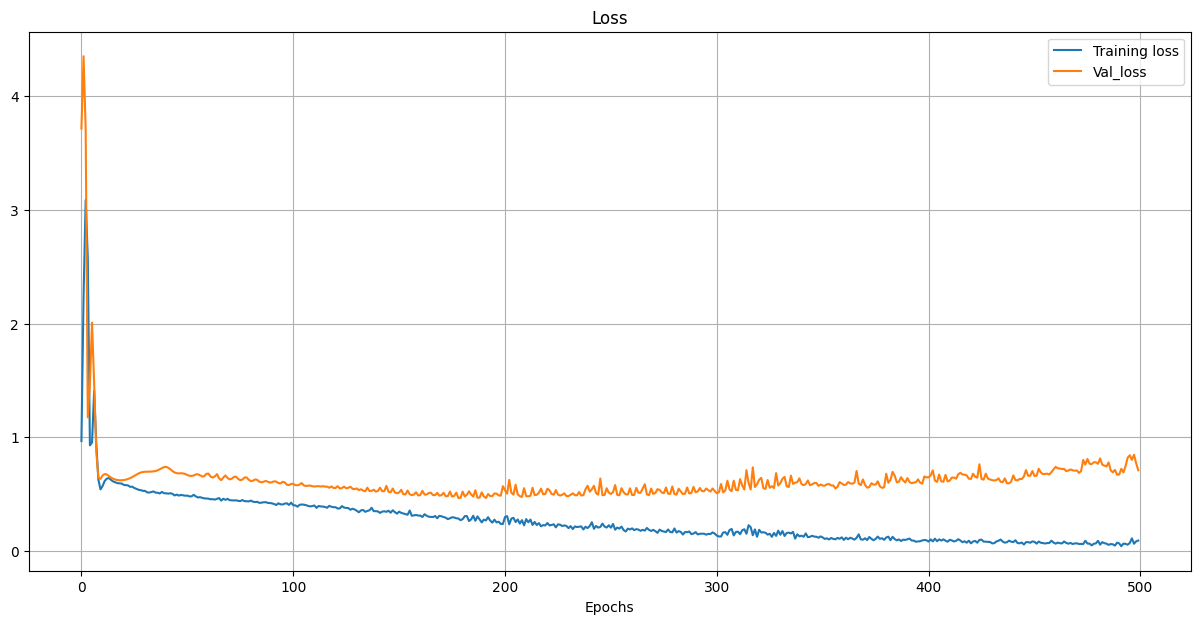

In [25]:
ax = pd.DataFrame(data=history.history).plot(y=['loss','val_loss'], figsize=(15, 7))
ax.grid()
ax.set(title="Loss", xlabel="Epochs")
ax.legend(["Training loss", "Val_loss"])
plt.show()

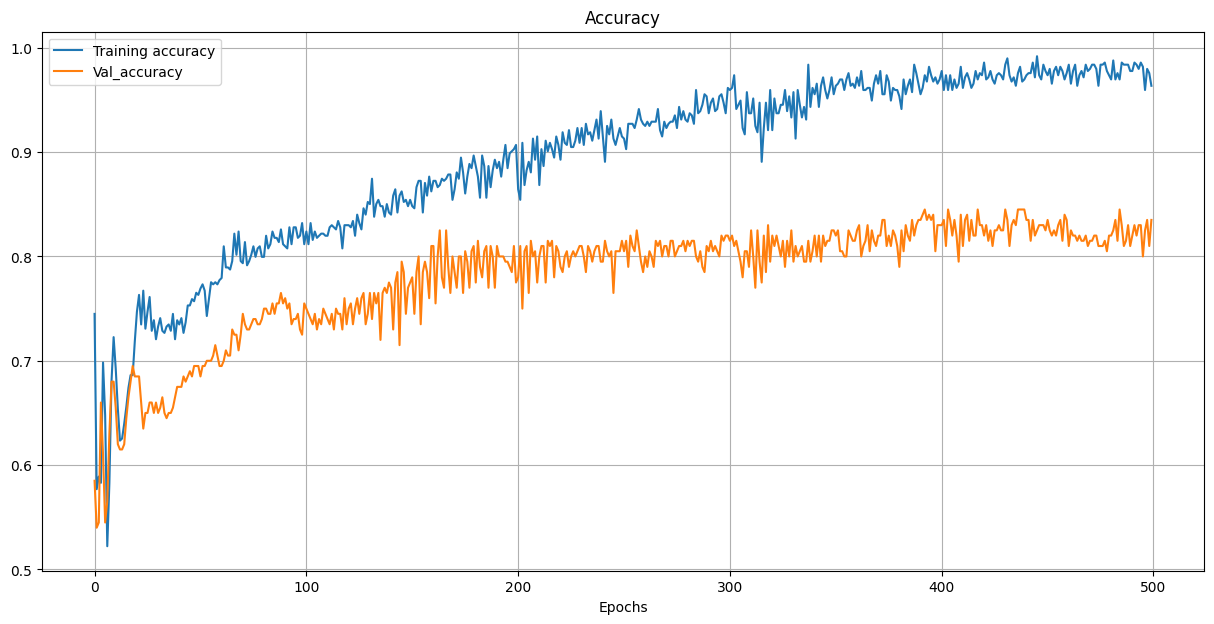

In [26]:
ax = pd.DataFrame(data=history.history).plot(y=['accuracy', 'val_accuracy'], figsize=(15, 7))
ax.grid()
ax.set(title="Accuracy", xlabel="Epochs")
ax.legend(["Training accuracy", "Val_accuracy"])
plt.show()

# Matrice de confusion  : Train

In [27]:
model.evaluate(train_generator)

1/1 [==============================] - 4s 4s/step - loss: 0.0543 - accuracy: 0.9838


[0.05429337918758392, 0.9838056564331055]

16/16 [==============================] - 4s 128ms/step


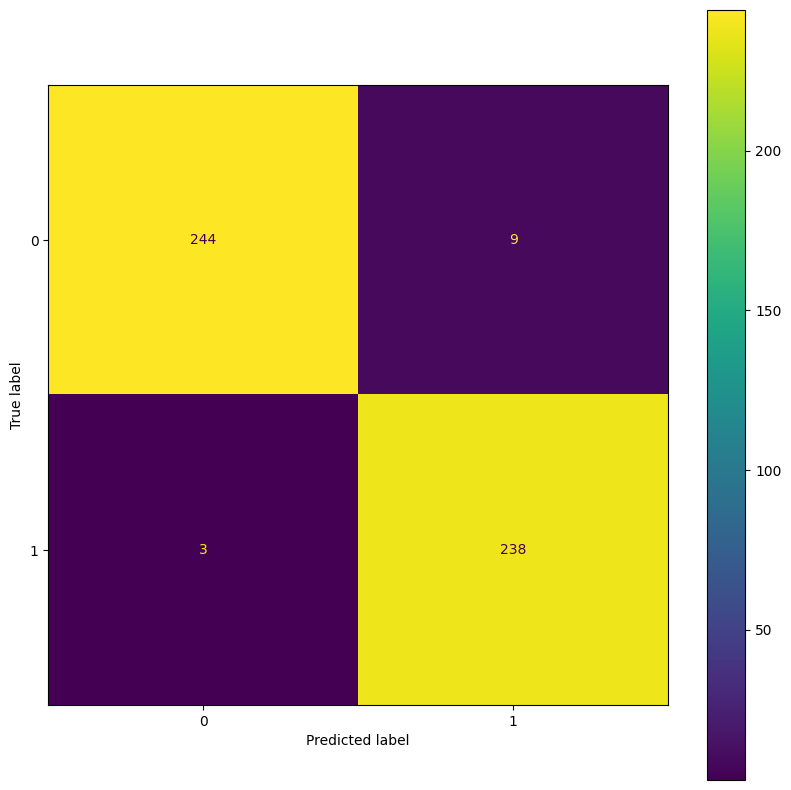

In [98]:
x_train =train_generator[0][0]
y_pred = np.where(model.predict(x_train)<0.5, 0,1) 
y_true = train_generator[0][1]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_true))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)

plt.show()

# Matrice de confusion  : Validation

In [29]:
model.evaluate(val_generator)

1/1 [==============================] - 1s 906ms/step - loss: 0.7104 - accuracy: 0.8350


[0.7103584408760071, 0.8349999785423279]

7/7 [==============================] - 2s 114ms/step


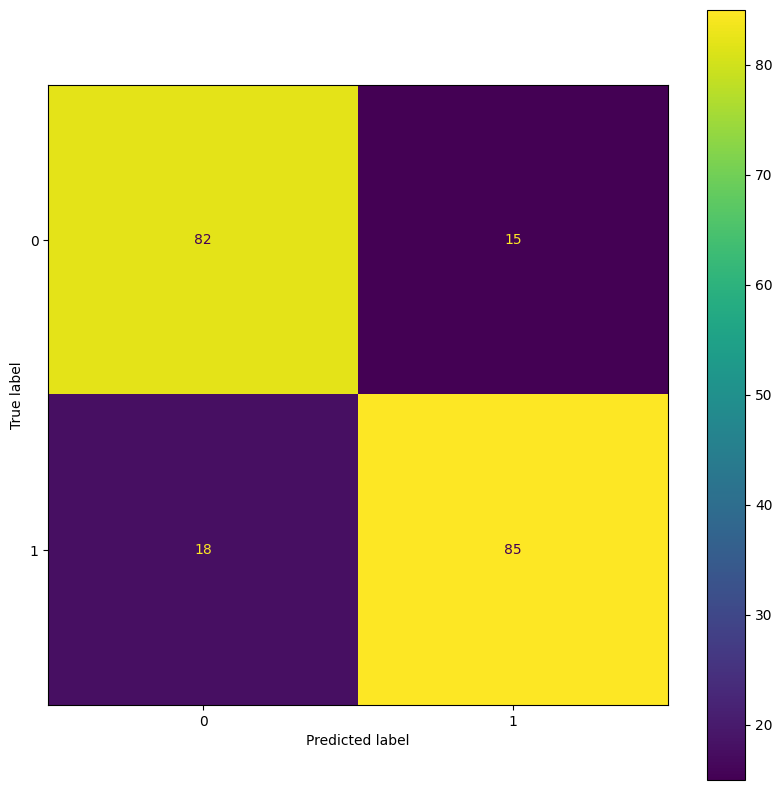

In [96]:
x_train =val_generator[0][0]
y_pred = np.where(model.predict(x_train)<0.5, 0,1) 
y_true = val_generator[0][1]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_true))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)


plt.show()

# Matrice de confusion  :Test

7/7 [==============================] - 2s 122ms/step


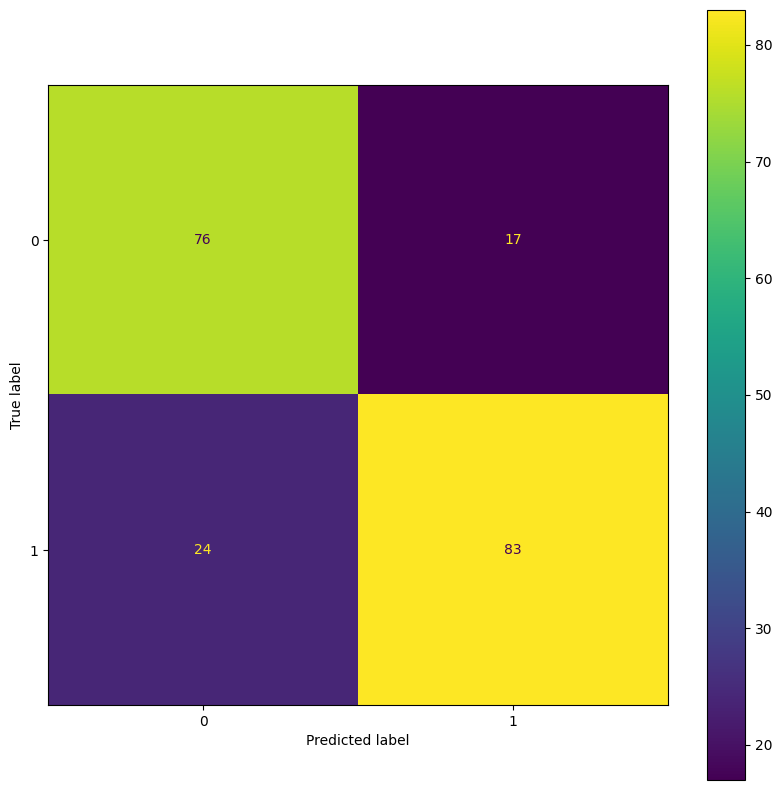

In [97]:
x_train =test_generator[0][0]
y_pred = np.where(model.predict(x_train)<0.5, 0,1) 
y_true = test_generator[0][1]
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_pred, y_true))
fig, ax = plt.subplots(figsize=(10,10))
display.plot(ax=ax)


plt.show()

In [32]:
model.evaluate(test_generator)

1/1 [==============================] - 1s 905ms/step - loss: 0.8327 - accuracy: 0.7950


[0.8327239751815796, 0.7950000166893005]

In [93]:
batch_holder = np.zeros((img_width, img_height))

img_dir=r"C:/Users/utilisateur/Desktop/IA/learningCode/Projects_Simplon/AlienVsPredator/Test/Alien/"

for i,img in enumerate(os.listdir(img_dir)):
    img = tf.keras.utils.load_img(os.path.join(img_dir,img), target_size=(img_height,img_width))
    #batch_holder[i, :] = img
   

In [95]:
import cv2
img=cv2.imread(img_dir)  # where f_path is the path to the image file
img=cv2.resize(img, (150,150), interpolation = cv2.INTER_AREA)  
img=img/255
# CV2 inputs images in BGR format in general when you train a model you may have
#trained it with images in rgb format. If so you need to convert the cv2 image.
#uncomment the line below if that is the case.
#img=img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
predictions=model.predict(img)
pre_class=predictions.argmax()
# this will give you an integer value

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
